<a href="https://colab.research.google.com/github/CristianoDataScience/regressao_linear/blob/main/trabalho_pratico_regresao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando Bibliotecas

In [76]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

#import stats
from collections import Counter


In [77]:
# criando DataFrame
base_custo_diaria = pd.read_csv('/content/drive/MyDrive/Trabalho_Regressao/custo_diaria.csv',
                 sep=';')
base_custo_diaria.head()

,qtd_pessoas,valor_diaria
0,1,150
1,3,200
2,4,650
3,6,499
4,7,549


In [78]:
base_custo_diaria.shape

(30, 2)

In [79]:
base_custo_diaria.dtypes

qtd_pessoas     int64
valor_diaria    int64
dtype: object

In [80]:
# Verificando contegem
base_custo_diaria.value_counts().sort_index()

qtd_pessoas  valor_diaria
1            150             1
3            200             1
4            650             1
6            499             1
7            549             1
10           980             1
12           700             1
13           735             1
15           859             1
16           900             1
18           989             1
20           1100            1
22           1075            1
23           1378            1
25           1500            1
27           1755            1
30           1850            1
32           2500            1
33           2000            1
40           1900            1
42           2089            1
43           2500            1
45           2250            1
47           2488            1
50           2680            1
51           2803            1
52           2890            1
53           3040            1
58           3150            1
60           3300            1
dtype: int64

In [81]:
# Analisando dados faltantes
base_custo_diaria.isnull().sum()

qtd_pessoas     0
valor_diaria    0
dtype: int64

In [82]:
# Métricas Estatísticas
base_custo_diaria.describe()

,qtd_pessoas,valor_diaria
count,30.000000,30.000000
mean,28.600000,1648.633333
std,18.189804,950.522197
min,1.000000,150.000000
25%,13.500000,869.250000
50%,26.000000,1627.500000
75%,44.500000,2497.000000
max,60.000000,3300.000000


In [83]:
# Criando variavel independente para X
x_custo_diaria = base_custo_diaria.iloc[:,0].values
x_custo_diaria

array([ 1,  3,  4,  6,  7, 10, 12, 13, 15, 16, 20, 18, 22, 23, 25, 27, 30,
       32, 33, 40, 42, 43, 45, 47, 50, 51, 52, 53, 58, 60])

In [84]:
# Criando variavel independente para Y
y_custo_diaria = base_custo_diaria.iloc[:,1].values
y_custo_diaria

array([ 150,  200,  650,  499,  549,  980,  700,  735,  859,  900, 1100,
        989, 1075, 1378, 1500, 1755, 1850, 2500, 2000, 1900, 2089, 2500,
       2250, 2488, 2680, 2803, 2890, 3040, 3150, 3300])

In [85]:
np.corrcoef(x_custo_diaria, y_custo_diaria) # Gerando uma martriz de correlação

array([[1.        , 0.97866601],
       [0.97866601, 1.        ]])

## Correlação

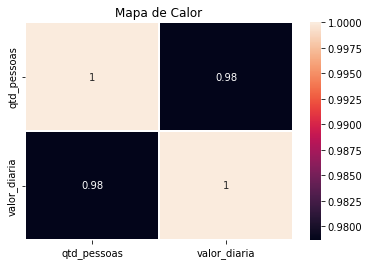

In [86]:
correlation = base_custo_diaria.corr()
# plot da matriz de correlação
plot = sns.heatmap(correlation, annot=True, linewidths=.4)
plt.title('Mapa de Calor')
plot;

## Tratando os dados para o modelo

In [87]:
# Visualisar o formato da variável
x_custo_diaria.shape

(30,)

In [88]:
# Visualizando variável
x_custo_diaria

array([ 1,  3,  4,  6,  7, 10, 12, 13, 15, 16, 20, 18, 22, 23, 25, 27, 30,
       32, 33, 40, 42, 43, 45, 47, 50, 51, 52, 53, 58, 60])

In [89]:
x_custo_diaria = x_custo_diaria.reshape(-1,1)
x_custo_diaria

array([[ 1],
       [ 3],
       [ 4],
       [ 6],
       [ 7],
       [10],
       [12],
       [13],
       [15],
       [16],
       [20],
       [18],
       [22],
       [23],
       [25],
       [27],
       [30],
       [32],
       [33],
       [40],
       [42],
       [43],
       [45],
       [47],
       [50],
       [51],
       [52],
       [53],
       [58],
       [60]])

In [90]:
# Agora temos uma matriz
x_custo_diaria.shape

(30, 1)

## Aplicando os dados ao algoritmo de machine learning

In [91]:
from sklearn.linear_model import LinearRegression
# criar um objeto do tipo regressão linear
previsao_custo_diaria = LinearRegression()

In [92]:
type(previsao_custo_diaria)

sklearn.linear_model._base.LinearRegression

## Realizando o Treinamento do modelo

In [93]:
previsao_custo_diaria.fit(x_custo_diaria, y_custo_diaria)

LinearRegression()

In [94]:
# Verificando a interceptação
previsao_custo_diaria.intercept_

186.00229281307384

In [95]:
# Verificando o coeficiente angular da reta
previsao_custo_diaria.coef_

array([51.14094547])

In [96]:
previsao_precos = previsao_custo_diaria.predict(x_custo_diaria) #Baseado nos n números de pessoas
previsao_precos

array([ 237.14323829,  339.42512923,  390.5660747 ,  492.84796565,
        543.98891112,  697.41174754,  799.69363849,  850.83458396,
        953.1164749 , 1004.25742038, 1208.82120227, 1106.53931132,
       1311.10309321, 1362.24403869, 1464.52592963, 1566.80782058,
       1720.230657  , 1822.51254794, 1873.65349341, 2231.64011172,
       2333.92200267, 2385.06294814, 2487.34483909, 2589.62673003,
       2743.04956645, 2794.19051192, 2845.3314574 , 2896.47240287,
       3152.17713023, 3254.45902118])

## Visualizando no gráfico as disposições dos dados

In [97]:
x_custo_diaria

array([[ 1],
       [ 3],
       [ 4],
       [ 6],
       [ 7],
       [10],
       [12],
       [13],
       [15],
       [16],
       [20],
       [18],
       [22],
       [23],
       [25],
       [27],
       [30],
       [32],
       [33],
       [40],
       [42],
       [43],
       [45],
       [47],
       [50],
       [51],
       [52],
       [53],
       [58],
       [60]])

In [98]:
x_custo_diaria.ravel() # Tranformando em matriz

array([ 1,  3,  4,  6,  7, 10, 12, 13, 15, 16, 20, 18, 22, 23, 25, 27, 30,
       32, 33, 40, 42, 43, 45, 47, 50, 51, 52, 53, 58, 60])

In [99]:
y_custo_diaria # Visualizando a matriz

array([ 150,  200,  650,  499,  549,  980,  700,  735,  859,  900, 1100,
        989, 1075, 1378, 1500, 1755, 1850, 2500, 2000, 1900, 2089, 2500,
       2250, 2488, 2680, 2803, 2890, 3040, 3150, 3300])

In [102]:
grafico = px.scatter(x=x_custo_diaria.ravel(), y = y_custo_diaria)
grafico.show()

In [109]:
grafico = px.scatter(x = x_custo_diaria.ravel(), y = y_custo_diaria)
grafico.add_scatter(x = x_custo_diaria.ravel(), y = previsao_precos, name= 'previsões')
grafico.show()

Verificando os valores de uma determinada previsão baseada na quantidade de pessoas

In [104]:
qtd_pessoas = 4
previsao_custo_diaria.intercept_ + previsao_custo_diaria.coef_ * qtd_pessoas

array([390.5660747])

In [105]:
qtd_pessoas = 8
previsao_custo_diaria.intercept_ + previsao_custo_diaria.coef_ * qtd_pessoas

array([595.12985659])

In [116]:
# Verificando o modelo direto
previsao_custo_diaria.predict([[25]])

array([1464.52592963])

In [118]:
# Verificando o modelo direto
previsao_custo_diaria.predict([[57]])

array([3101.03618476])

In [111]:
# Indica a quantidade do algoritmo (Quanto mais próximo de 1, melhor a qualidade do modelo)
previsao_custo_diaria.score(x_custo_diaria, y_custo_diaria)

0.9577871649322629

In [112]:
# Visualizar os erros do modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error
MSE = mean_squared_error(y_custo_diaria, previsao_precos)

In [113]:
MSE

36867.67840031127

In [114]:
# Calculando MAE
mean_absolute_error(y_custo_diaria, previsao_precos)

138.91296481574125

In [115]:
# Calculando RMSE = desvio padrão
np.sqrt(MSE)

192.0095789285297